### Leio o dataset

Preferi não dividir em dois arquivos dessa vez

In [36]:
import pandas as pd

df = pd.read_csv("dataset/cars_24_combined.csv")
df.head()

,id,Car Name,Year,Distance,Owners,Fuel,Location,Drive,Type,Price
0,0,Maruti S PRESSO,2022.0,3878,1,PETROL,HR-98,Manual,HatchBack,514000
1,1,Hyundai Xcent,2018.0,32041,1,PETROL,TN-22,Manual,Sedan,674000
2,2,Tata Safari,2021.0,96339,1,DIESEL,TS-08,Automatic,SUV,1952000
3,3,Maruti Vitara Brezza,2019.0,51718,1,DIESEL,WB-24,Manual,SUV,690000
4,4,Tata Tiago,2021.0,19811,1,PETROL,HR-51,Manual,HatchBack,526000


### Vejo informações do dataset

Com isso, consigo saber o tipo das variáveis independentes

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8015 entries, 0 to 8014
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8015 non-null   int64  
 1   Car Name  8014 non-null   object 
 2   Year      8014 non-null   float64
 3   Distance  8015 non-null   int64  
 4   Owners    8015 non-null   int64  
 5   Fuel      8015 non-null   object 
 6   Location  7802 non-null   object 
 7   Drive     8015 non-null   object 
 8   Type      8015 non-null   object 
 9   Price     8015 non-null   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 626.3+ KB


### Descrevo as variáveis categóricas

In [38]:
df_categoricas = df[["Car Name","Fuel","Location","Drive","Type"]].astype(str)

qtd_unico = df_categoricas.nunique()
valores_unicos = df_categoricas.apply(lambda x: x.unique())

pd.DataFrame({'Quantidade de valores únicos': qtd_unico, 'Valores únicos': valores_unicos})

,Quantidade de valores únicos,Valores únicos
Car Name,127,"[Maruti S PRESSO, Hyundai Xcent, Tata Safari, ..."
Fuel,4,"[PETROL, DIESEL, CNG, LPG]"
Location,437,"[HR-98, TN-22, TS-08, WB-24, HR-51, MH-14, nan..."
Drive,2,"[Manual, Automatic]"
Type,5,"[HatchBack, Sedan, SUV, Lux_SUV, Lux_sedan]"


### Extraio a marca dos carros para não usar diversas variáveis categórias para cada modelo de carro

In [ ]:
# Pega a primeira palavra
df['CarBrand'] = df['Car Name'].str.split(' ').str[0]
# Preenche o valor nulo com 'Unknown'
df['CarBrand'].fillna('Unknown', inplace=True)

print("\nValores únicos em CarBrand:")
print(df['CarBrand'].unique())

Novas colunas 'CarBrand' e 'Location_State' criadas.

Valores únicos em CarBrand:
['Maruti' 'Hyundai' 'Tata' 'Renault' 'Honda' 'Ford' 'Datsun' 'Toyota'
 'Mahindra' 'Nissan' 'KIA' 'Volkswagen' 'Skoda' 'BMW' 'Jeep' 'MG'
 'Unknown']

Valores únicos em Location_State (Top 10):
Location_State
MH         1426
KA         1215
DL          859
GJ          764
TN          661
TS          653
HR          602
UP          462
WB          280
Unknown     213
Name: count, dtype: int64


C:\Users\Nathan\AppData\Local\Temp\ipykernel_19024\947567778.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CarBrand'].fillna('Unknown', inplace=True)
C:\Users\Nathan\AppData\Local\Temp\ipykernel_19024\947567778.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

### Pego o prefixo do estado de localização

In [ ]:
# Pega o prefixo antes do '-' (ex: "HR-98" -> "HR")
df['Location_State'] = df['Location'].str.split('-').str[0]
# Preenche os 213 nulos com 'Unknown'
df['Location_State'].fillna('Unknown', inplace=True)

print("\nValores únicos em Location_State (Top 10):")
print(df['Location_State'].value_counts().head(10))

### Tiro a coluna do Id, Car Name e Location"

In [40]:
df = df.drop(["id","Car Name","Location"], axis=1)

### Faço a One-Hot encoding para variáveis categóricas

##### Fiz uso da marca do carro e da localização para tentar aumentar o score do modelo

In [41]:
df_encoded = pd.get_dummies(df, columns=["Fuel", "Drive", "Type", "CarBrand", "Location_State"]) # One-Hot encoding 

df_encoded.drop(["Fuel_LPG"], axis=1, inplace=True) # Das 8k linhas só tem um caso que usa esse combustível

# preencher dados faltantes
df_encoded['Year'].fillna(df_encoded['Year'].median(), inplace=True)

df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8015 entries, 0 to 8014
Data columns (total 49 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    8015 non-null   float64
 1   Distance                8015 non-null   int64  
 2   Owners                  8015 non-null   int64  
 3   Price                   8015 non-null   int64  
 4   Fuel_CNG                8015 non-null   bool   
 5   Fuel_DIESEL             8015 non-null   bool   
 6   Fuel_PETROL             8015 non-null   bool   
 7   Drive_Automatic         8015 non-null   bool   
 8   Drive_Manual            8015 non-null   bool   
 9   Type_HatchBack          8015 non-null   bool   
 10  Type_Lux_SUV            8015 non-null   bool   
 11  Type_Lux_sedan          8015 non-null   bool   
 12  Type_SUV                8015 non-null   bool   
 13  Type_Sedan              8015 non-null   bool   
 14  CarBrand_BMW            8015 non-null   

C:\Users\Nathan\AppData\Local\Temp\ipykernel_19024\3037881383.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_encoded['Year'].fillna(df_encoded['Year'].median(), inplace=True)


### A Matriz de correlação ficou ilegível por causa da grande quantidade de variáveis categóricas que foram criadas. Por isso, resolvi dividir a exibição da correlação em vários gráficos

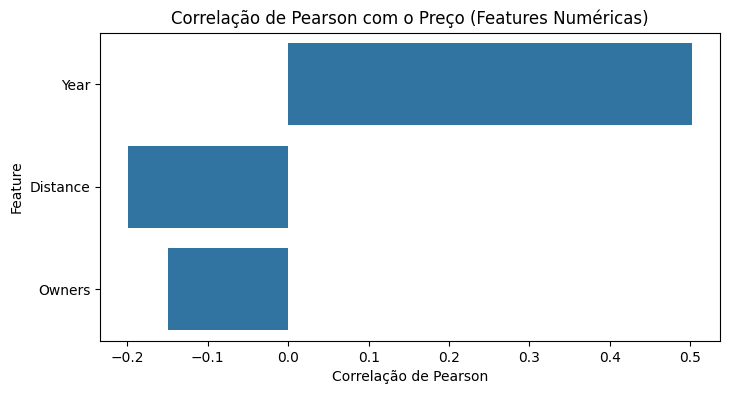

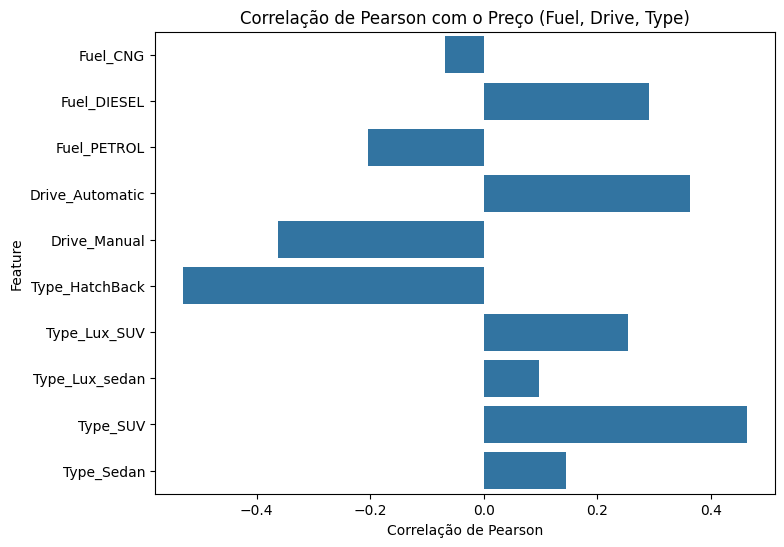

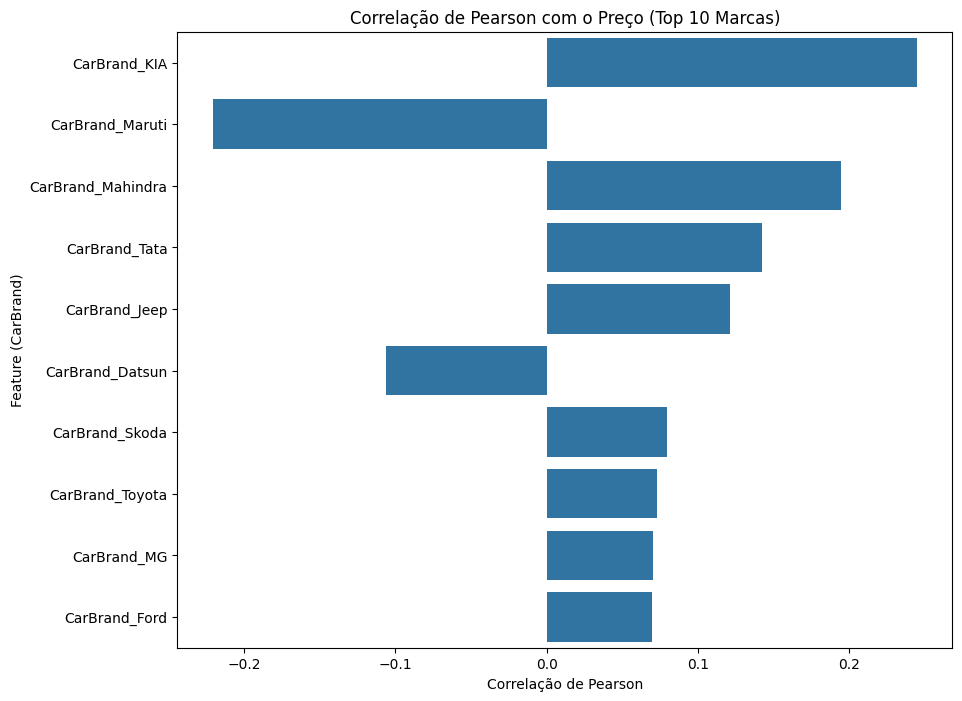

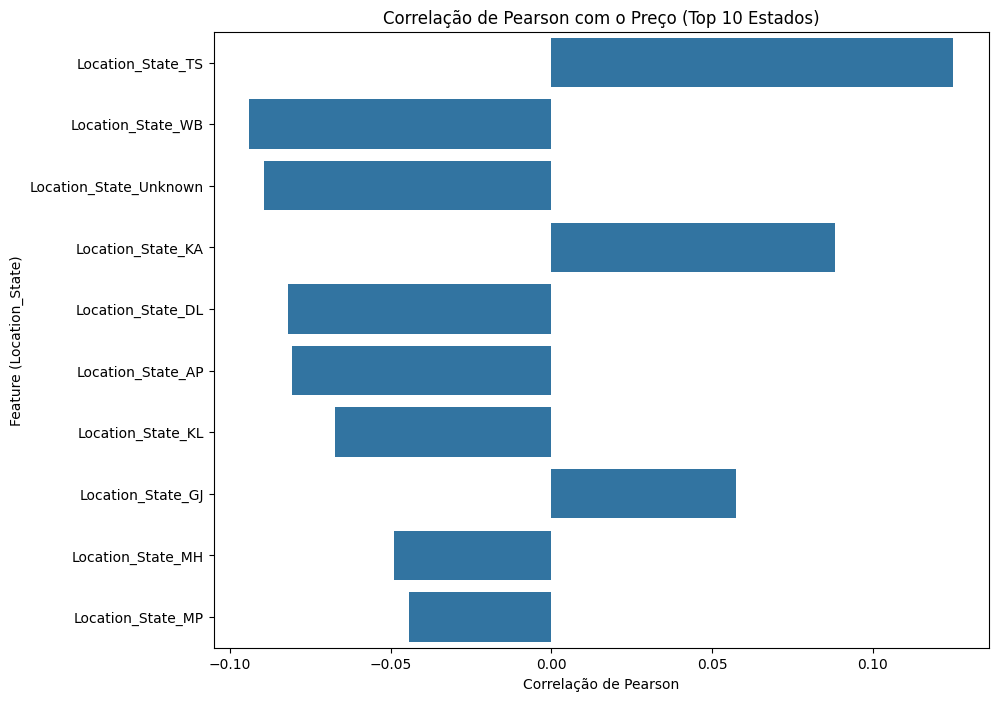

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt


# Separo a variável dependente das independentes
X = df_encoded.drop("Price", axis=1)
y = df_encoded["Price"]

# 1. Calcular a correlação de Pearson de todas as features (X) com o Preço (y)
correlations = X.corrwith(y)

# 2. Separar as colunas por grupos lógicos
numeric_cols = ['Year', 'Distance', 'Owners']
main_cat_cols = [col for col in X.columns if col.startswith(('Fuel_', 'Drive_', 'Type_'))]
brand_cols = [col for col in X.columns if col.startswith('CarBrand_')]
location_cols = [col for col in X.columns if col.startswith('Location_State_')]

# --- Gráfico 1: Features Numéricas ---
if not correlations.empty:
    plt.figure(figsize=(8, 4))
    sns.barplot(x=correlations[numeric_cols].values, y=correlations[numeric_cols].index, orient='h')
    plt.title('Correlação de Pearson com o Preço (Features Numéricas)')
    plt.xlabel('Correlação de Pearson')
    plt.ylabel('Feature')
    plt.show()

# --- Gráfico 2: Features Categóricas Principais ---
if not correlations.empty and main_cat_cols:
    plt.figure(figsize=(8, 6))
    sns.barplot(x=correlations[main_cat_cols].values, y=correlations[main_cat_cols].index, orient='h')
    plt.title('Correlação de Pearson com o Preço (Fuel, Drive, Type)')
    plt.xlabel('Correlação de Pearson')
    plt.ylabel('Feature')
    plt.show()

# --- Gráfico 3: Marcas de Carro (Top 10 por correlação) ---
if not correlations.empty and brand_cols:
    # Selecionar apenas as 10 marcas com maior correlação (positiva ou negativa)
    top_brands = correlations[brand_cols].abs().nlargest(10).index
    
    plt.figure(figsize=(10, 8))
    sns.barplot(x=correlations[top_brands].values, y=correlations[top_brands].index, orient='h')
    plt.title('Correlação de Pearson com o Preço (Top 10 Marcas)')
    plt.xlabel('Correlação de Pearson')
    plt.ylabel('Feature (CarBrand)')
    plt.show()

# --- Gráfico 4: Estados (Top 10 por correlação) ---
if not correlations.empty and location_cols:
    # Selecionar apenas os 10 estados com maior correlação (positiva ou negativa)
    top_locations = correlations[location_cols].abs().nlargest(10).index
    
    plt.figure(figsize=(10, 8))
    sns.barplot(x=correlations[top_locations].values, y=correlations[top_locations].index, orient='h')
    plt.title('Correlação de Pearson com o Preço (Top 10 Estados)')
    plt.xlabel('Correlação de Pearson')
    plt.ylabel('Feature (Location_State)')
    plt.show()

### Vejo a ocorrência de cada variável categórica

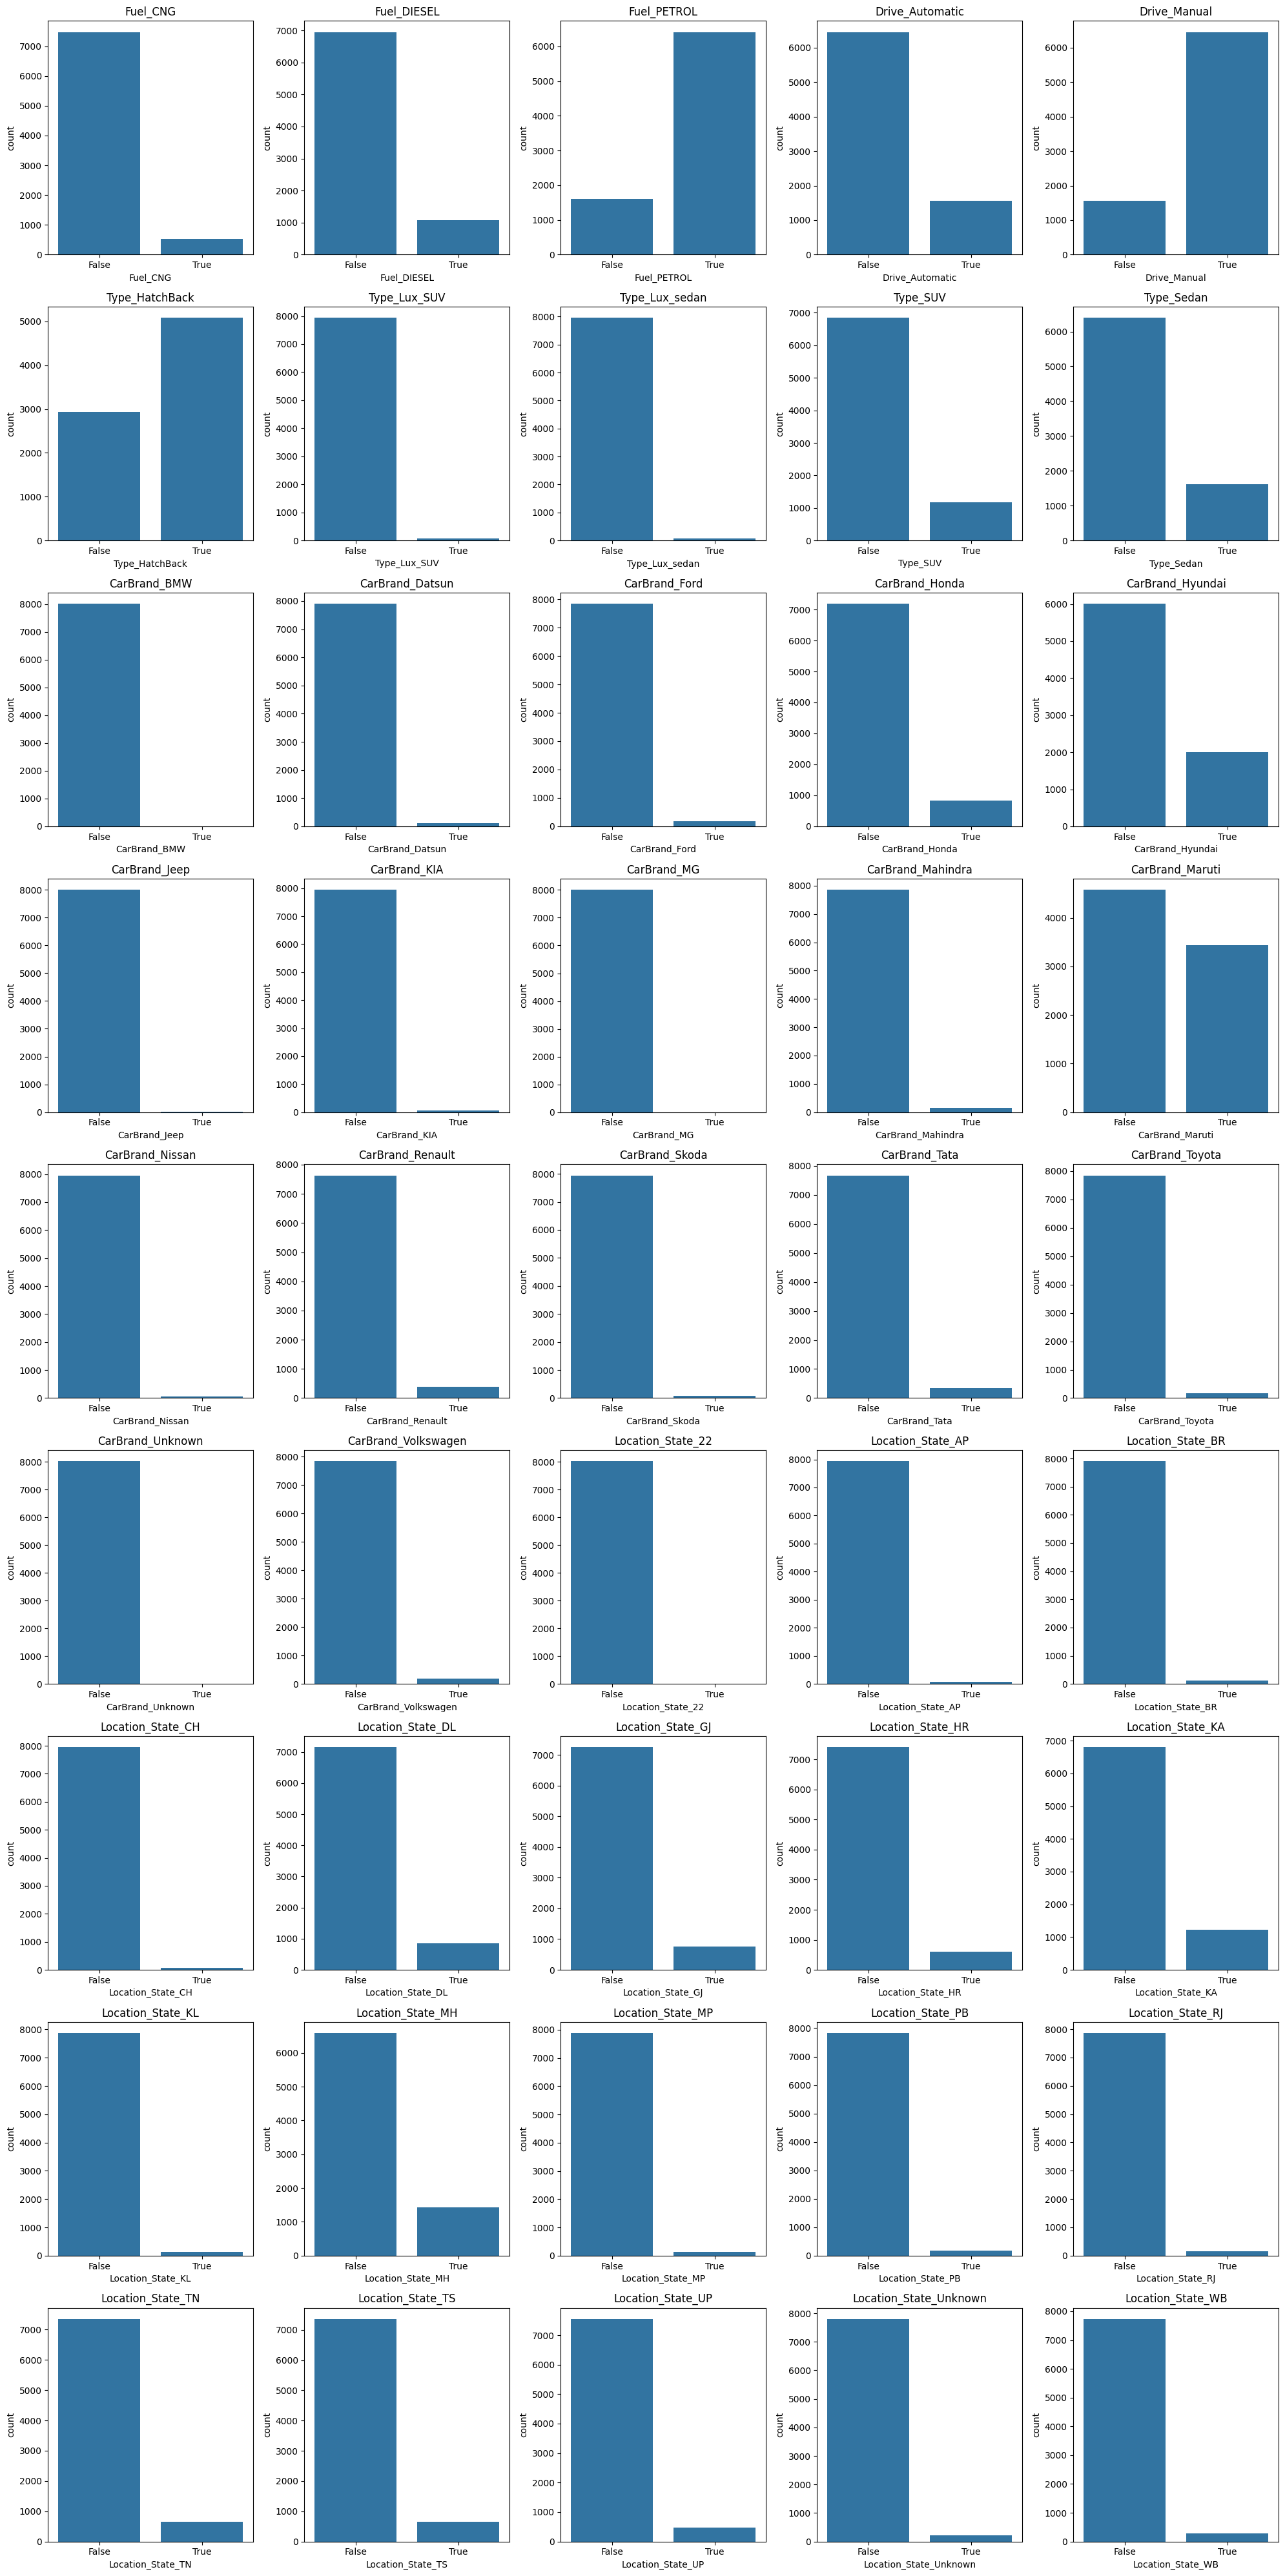

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleciona colunas com apenas 0 e 1
one_hot_cols = [col for col in df_encoded.columns if sorted(df_encoded[col].dropna().unique()) in [[0], [1], [0,1], [1,0]]]

n_cols = 5
n_rows = (len(one_hot_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20,40))
axes = axes.flatten()

for i, col in enumerate(one_hot_cols):
    sns.countplot(x=col, data=df_encoded, ax=axes[i])
    axes[i].set_title(col)

# remove subplots extras
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### Divido o dataset

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28, shuffle=True)

### Faço uma transformação logarítmica em y para tentar fazer uma distribuição normal do dataset

Distribuição do Preço (Original vs Log)


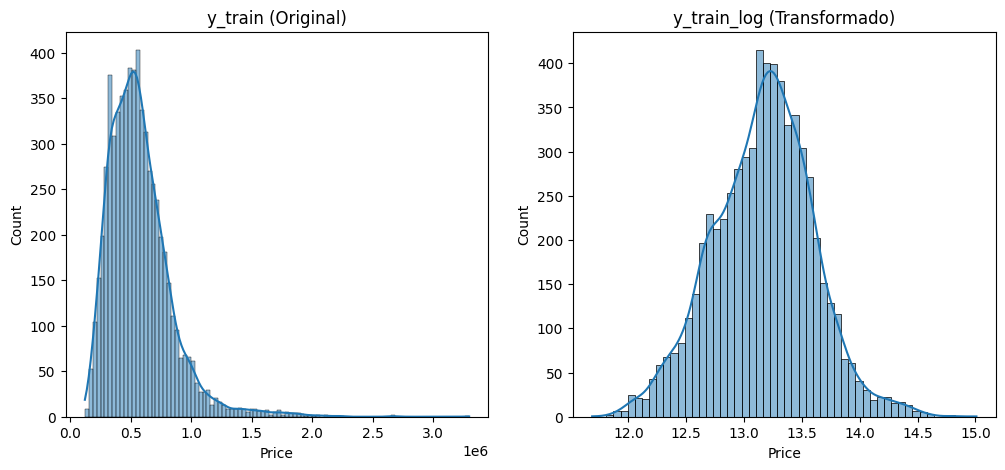

In [45]:
# Célula NOVA - Transformação Logarítmica do Alvo (y)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Aplicar log(1 + x) para diminuir a assimetria (skew) do preço
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# Visualizar a diferença
print("Distribuição do Preço (Original vs Log)")
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(y_train, kde=True, ax=axes[0])
axes[0].set_title('y_train (Original)')
sns.histplot(y_train_log, kde=True, ax=axes[1])
axes[1].set_title('y_train_log (Transformado)')
plt.show()

### Defino o modelo de Random Forest

In [73]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

# definindo o espaço de busca
param_dist = {
    'n_estimators': randint(100, 800),
    'max_depth': [10, 20, 30, None],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2', 1.0],
    'criterion': ['squared_error', 'absolute_error']
}

rf_base = RandomForestRegressor(random_state=28)

random_search = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_dist,
    n_iter=20,  
    cv=4,       
    scoring='r2',
    n_jobs=-1,
    random_state=28,
    verbose=1 
)

random_search.fit(X_train, y_train_log)

print(f"Melhor R² (em validação cruzada, escala log): {random_search.best_score_:.4f}")
print("Melhores parâmetros encontrados:")
print(random_search.best_params_)

Iniciando a busca aleatória RÁPIDA por hiperparâmetros...
Fitting 4 folds for each of 20 candidates, totalling 80 fits

--- Busca Rápida Concluída ---
Melhor R² (em validação cruzada, escala log): 0.7388
Melhores parâmetros encontrados:
{'criterion': 'absolute_error', 'max_depth': 20, 'max_features': 1.0, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 615}


### Treino o modelo

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

melhor_modelo_rf = random_search.best_estimator_

melhor_modelo_rf.fit(X_train, y_train_log)

### Calculo algumas métricas

In [94]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, median_absolute_error

y_pred_log = melhor_modelo_rf.predict(X_test)

# Destransformo da escala log
y_pred_final = np.expm1(y_pred_log)

r2_final = r2_score(y_test, y_pred_final)
mae_final = mean_absolute_error(y_test, y_pred_final)
mse_final = mean_squared_error(y_test, y_pred_final)
rmse_final = np.sqrt(mse_final)
mape_final = mean_absolute_percentage_error(y_test, y_pred_final)
medae_final = median_absolute_error(y_test, y_pred_final)

print("\n--- Resultados Finais no Conjunto de Teste ---")
print(f"R² (R-squared): {r2_final * 100:.2f}%")
print(f"MAE (Erro Médio Absoluto): {mae_final:,.0f} (em $)")
print(f"RMSE (Erro Quadrático Médio Raiz): {rmse_final:,.0f} (em $)")
print(f"MedAE (Erro Absoluto Mediano): {medae_final:,.0f} (em $)")
print(f"MAPE (Erro Percentual Absoluto Médio): {mape_final * 100:.2f}%")


--- Resultados Finais no Conjunto de Teste ---
R² (R-squared): 74.07%
MAE (Erro Médio Absoluto): 92,235 (em $)
RMSE (Erro Quadrático Médio Raiz): 132,420 (em $)
MedAE (Erro Absoluto Mediano): 68,660 (em $)
MAPE (Erro Percentual Absoluto Médio): 16.77%


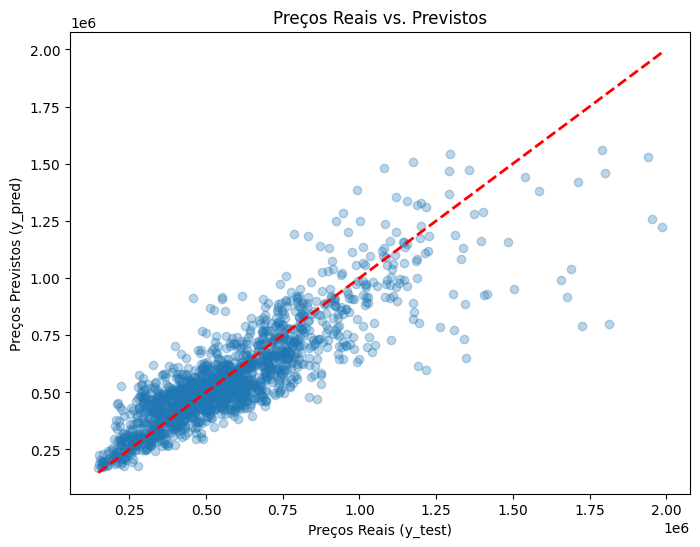

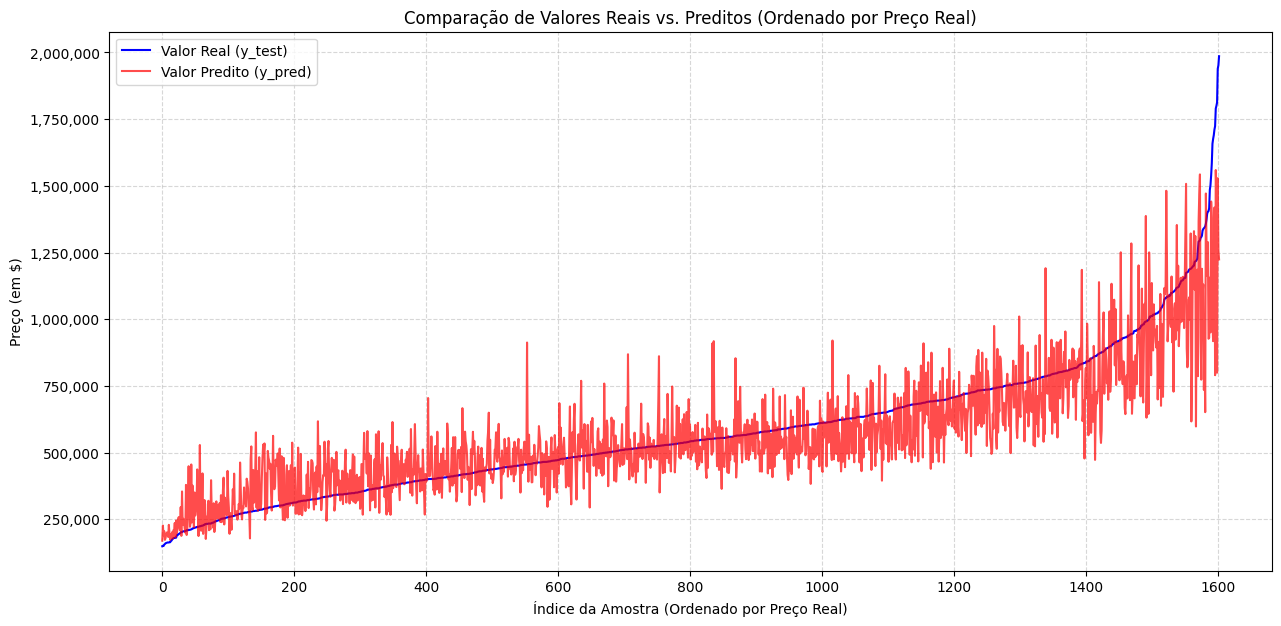

In [ ]:
from matplotlib.ticker import FuncFormatter

# Visualizar Previsões vs Reais
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_final, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel("Preços Reais (y_test)")
plt.ylabel("Preços Previstos (y_pred)")
plt.title(f"Preços Reais vs. Previstos")
plt.show()

df_comparacao = pd.DataFrame({
    'Real': y_test.values,
    'Predito': y_pred_final
})

df_comparacao_sorted = df_comparacao.sort_values(by='Real')

df_comparacao_sorted = df_comparacao_sorted.reset_index(drop=True)

plt.figure(figsize=(15, 7))

sns.lineplot(
    data=df_comparacao_sorted, 
    x=df_comparacao_sorted.index,  
    y='Real', 
    color='blue', 
    label='Valor Real (y_test)'
)

sns.lineplot(
    data=df_comparacao_sorted, 
    x=df_comparacao_sorted.index,  
    y='Predito', 
    color='red', 
    label='Valor Predito (y_pred)', 
    alpha=0.7, 
    linestyle='-'
)

plt.title('Comparação de Valores Reais vs. Preditos (Ordenado por Preço Real)')
plt.xlabel('Índice da Amostra (Ordenado por Preço Real)')
plt.ylabel('Preço (em $)')

def formatar_preco(valor, pos):
    return f'{int(valor):,}'

plt.gca().yaxis.set_major_formatter(FuncFormatter(formatar_preco))

plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()